In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics
#%matplotlib notebook
from scipy.fft import fft

In [2]:
def mypgmread(filename):
    with open(filename,'rb') as f:#write binary olarak dosyayı açtım, bu sayede pgm dosyasına binary yazabiliyorum.
        magic_word = f.readline().strip().decode() #Magicword. Strip metodu ile stringin başında ve sonundaki boşlukları kaldırıyoruz.
        comment = '#'
        f_content = f.readline().decode()
        while(f_content[0] == '#'):#Yorum satırlarını ayırt etmek için.
            f_content = f.readline()
#split metodu default olarak stringi boşluklardan ayırır. kelime kelime listeler.
        [width,height] = f_content.split()
        width = int(width)
        height = int(height)
        maxval = f.readline().decode()
        maxval = int(maxval)
        #print(magic_word)
        #print(f'width: {width}, height: {height}')
       # print(maxval)
        i = 0
        j = 0
        imgValue = [[0 for i in range(width)] for j in range(height)]
        byte = f.read(1)
        counter = 0
        while(counter != width*height):
            #print(f'i = {i}\nj = {j}')
            imgValue[i][j] = ord(byte)
            #print(f'byte {ord(byte)}')
            j += 1
            counter += 1
            if(j == width):
                i += 1
                j = 0
            byte = f.read(1)
    return magic_word,width,height,maxval,imgValue

In [3]:
def my2Dfft(data,width,height):
    data_fft = np.array([[0 for i in range(width)] for j in range(height)],dtype=np.complex_)
    last_data_fft = np.array([[0 for i in range(width)] for j in range(height)],dtype=np.complex_)
    for i in range(height):
        data_fft[i] = np.fft.fft(data[i])

    for j in range(width):
        last_data_fft[:,j] = np.fft.fft(data_fft[:,j])
    
    return last_data_fft
    

In [55]:
def normalization(data):
    height = len(data)
    width = len(data[0])
    normalized = np.array([[0 for i in range(width)] for j in range(height)])
    minimum = np.min(data)
    maximum = np.max(data)
    normalized = 255*(data - minimum)/(maximum-minimum)
    return normalized        
    

Text(0.5, 1.0, 'Orijinal görüntü')

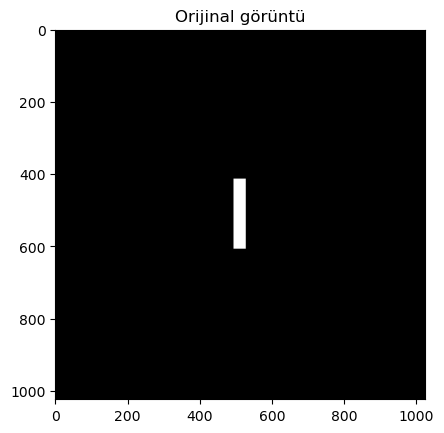

In [56]:
mw,width,height,maxval,data = mypgmread("fig0424.pgm")
plt.imshow(data,cmap="gray",vmin=0,vmax=255)
plt.title("Orijinal görüntü")

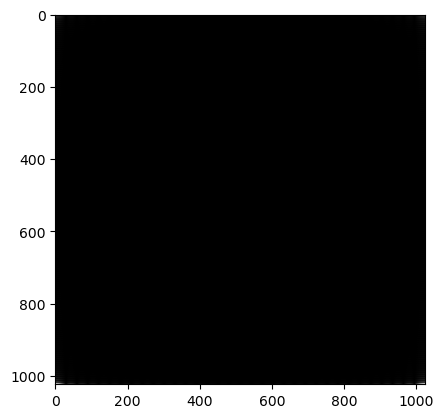

In [76]:
newData = my2Dfft(data,width,height)
newData_abs = np.abs(newData)

newData_abs = normalization(newData_abs)

plt.imshow(newData_abs,cmap="gray",vmin=0,vmax=255)

### Yukarıdaki görüntü hizalama işlemi yapılmadan önceki 2D fourier dönüşümünün sonucu elde edilen görüntüdür. Bu görüntünün köşelerini beyaz olarak görmemiz beklenmektedir ve sağ alt ve sol alt köşede bu beyazlıklar biraz görülmektedir. Sol üst ve sağ üst köşede ise anlaşılmasa da bir alt hücrede ekrana bastırdığım piksellerden o köşelerin de beyaz olduğu anlaşılmaktadır.

In [22]:
print(newData[1023][1023])
print(newData[0][1023])
print(newData[1023][0])
print(newData[0][0])
print(newData[300][300])

239.7744105325955
254.53822018190857
240.20940604564493
255.0
0.0036828828410312435


In [57]:
def myShiftCenter(data,width,height):
    temp = np.array([[0 for i in range(width)] for j in range(height)])
    for i in range(height):
        for j in range(width):
            temp[i][j] = data[i][j] * (-1)**(i+j)
    return temp

Text(0.5, 1.0, 'Hizalanmış ve fourieri alınmış görüntü')

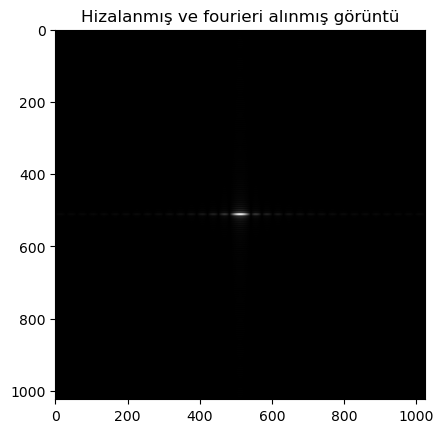

In [58]:
newData = myShiftCenter(data,width,height)
newData_fft = my2Dfft(newData,width,height)
newData_fft_abs = np.abs(newData_fft)
newData_fft_normalized = normalization(newData_fft_abs)

plt.imshow(newData_fft_normalized,cmap="gray",vmin=0,vmax=255)
plt.title("Hizalanmış ve fourieri alınmış görüntü")

### DC noktayı görüntünün merkezine hizaladık 

In [71]:
def myImageLog(width,height,img,c):
    newImg = np.array([[0 for i in range(width)] for i in range(height)],dtype=float)#Pikseller float değerlerde olabileceği için veri tipi float olarak belirlendi.
    for i in range(height):
        for j in range(width):
            newImg[i][j] = c*math.log10(img[i][j]+1)
    return newImg

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.20102207 1.48587952 ... 1.65335663 1.48587952 1.20102207]
 [0.         1.40914426 1.69931218 ... 1.86860757 1.69931218 1.40914426]
 ...
 [0.         1.43043485 1.72101329 ... 1.890448   1.72101329 1.43043485]
 [0.         1.40914426 1.69931218 ... 1.86860757 1.69931218 1.40914426]
 [0.         1.20102207 1.48587952 ... 1.65335663 1.48587952 1.20102207]]
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.         49.19200614 60.85932654 ... 67.71892956 60.85932654
  49.19200614]
 [ 0.         57.71636905 69.60119805 ... 76.5352752  69.60119805
  57.71636905]
 ...
 [ 0.         58.58839853 70.49004177 ... 77.42982535 70.49004177
  58.58839853]
 [ 0.         57.71636905 69.60119805 ... 76.5352752  69.60119805
  57.71636905]
 [ 0.         49.19200614 60.85932654 ... 67.71892956 60.85932654
  49.19200614]]
255.0


Text(0.5, 1.0, 'Fig 4.24(d) görüntüsü')

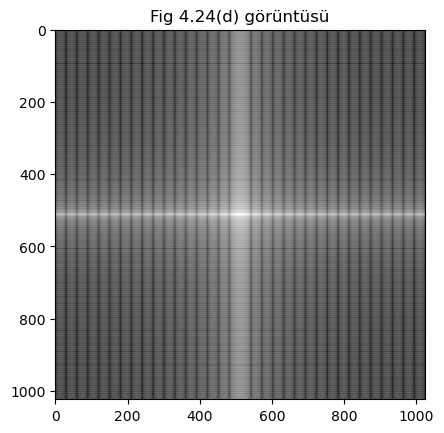

In [72]:
newImg = myImageLog(width,height,newData_fft_abs,1)
print(newImg)
normalizedImg = normalization(newImg)
print(normalizedImg)
print(np.max(normalizedImg))
plt.imshow(normalizedImg,cmap="gray",vmin=0,vmax=255)
plt.title("Fig 4.24(d) görüntüsü")

### önceki görüntünün logaritmasını alarak beyaz yerleri ölçeklendirdik

In [46]:
def my2Difft(data,width,height):
    temp = np.array([[0 for i in range(width) for j in range(height)]])
    temp = my2Dfft(np.conjugate(data),width,height)
    
    
    return temp
    

8.57544887161786e-16


Text(0.5, 1.0, "Fig 4.24(b)'nin ters fourier görüntüsü'")

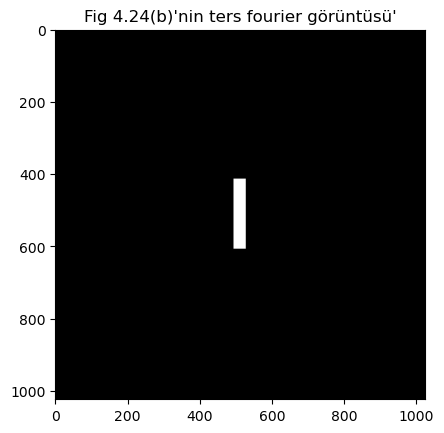

In [78]:
inverse = my2Difft(newData,width,height)
inverse = np.abs(inverse)
normalizedInverse = normalization(inverse)
plt.imshow(normalizedInverse,cmap="gray",vmin=0,vmax=255)
print(normalizedInverse[0][0])
plt.title("Fig 4.24(b)'nin ters fourier görüntüsü'")

### Yukarıdaki görüntü 4.24(b) görüntüsünün ters fourier işleminden geçerek orijinal görüntünün elde edilmesinin örneğidir. Yazdığımız my2difft fonksiyonu my2dfft fonksiyonunu değiştirmeden sadece konjugesini alarak yazılmıştır ve bu sayede fourieri alınmış görüntüden orijinal görüntüyü elde edebildik.

255.0


Text(0.5, 1.0, "Fig 4.24(d)'nin ters fourier görüntüsü'")

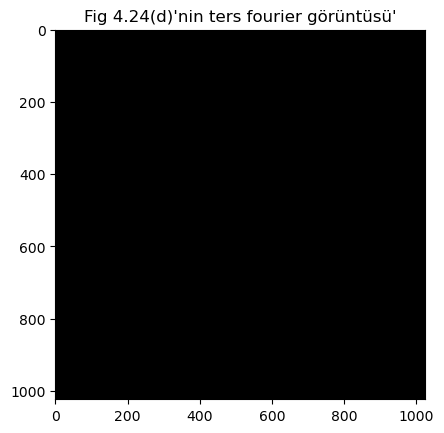

In [79]:
inverse = my2Difft(newImg,width,height)
inverse = np.abs(inverse)
normalizedInverse = normalization(inverse)
plt.imshow(normalizedInverse,cmap="gray",vmin=0,vmax=255)
print(normalizedInverse[0][0])
plt.title("Fig 4.24(d)'nin ters fourier görüntüsü'")

### 4.24(d) şeklinin tersi elde edilememiştir. Bu görüntüdeki gelen değerler complex olmadığı için elde edilemediği düşünülmektedir.